In [44]:
import numpy as np
import matplotlib.pyplot as plt

class HardMarginSVMBinaryClassification():
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, xi in enumerate(X):
                condition = y[idx]*(np.dot(xi,self.w)-self.b)>=1
                if condition:
                    self.w -= self.learning_rate * (2 * 1 / self.epochs * self.w)
                else:
                    self.w -= self.learning_rate * (2 * 1 / self.epochs * self.w - y[idx] * xi)
                    self.b = self.b - self.learning_rate*y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

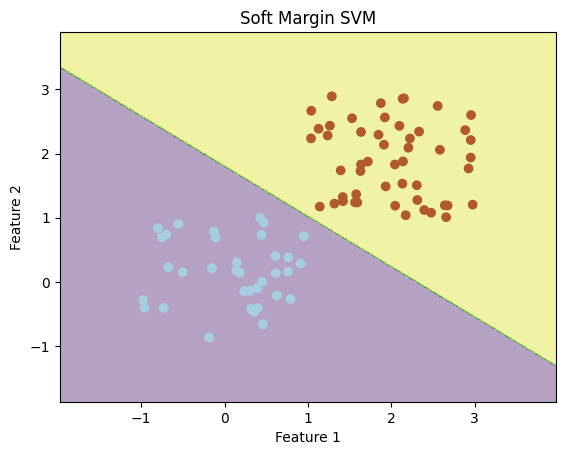

In [45]:
# Generate synthetic linearly separable data for testing
np.random.seed(0)
X_positive = np.random.rand(50, 2) * 2 + 1
X_negative = np.random.rand(35, 2) * 2 - 1
X = np.vstack((X_positive, X_negative))
y = np.hstack((np.ones(50), -np.ones(35)))

# Instantiate and train the SVM model
svm = HardMarginSVMBinaryClassification(learning_rate=0.01, epochs=1000)
svm.fit(X, y)

# Generate a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM')
plt.show()